In [1]:
import numpy as np
from sklearn.decomposition import PCA

import seaborn as sns; 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from SOM import Lattice_2D
from Visualization import plot3D

# First step : Generation of the Data

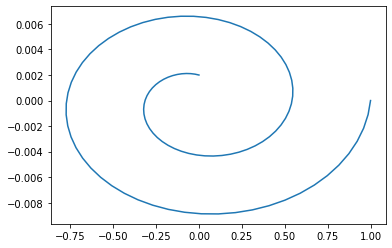

In [2]:
nb_values = 100
r = np.linspace(0.2, 1, nb_values)
theta = np.linspace(np.pi/2, 4*np.pi, nb_values)
x, y = r*np.cos(theta), r*np.sin(theta)*0.01


plt.plot(x, y)

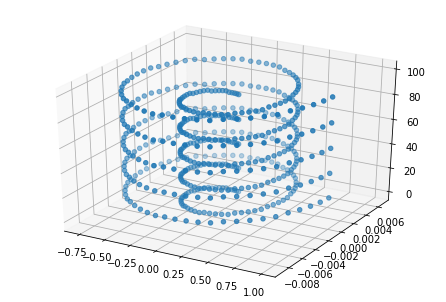

In [3]:
nb_repeat = 5
X = np.repeat([x], nb_repeat, axis=0).reshape([-1])
Y = np.repeat([y], nb_repeat, axis=0).reshape([-1])
Z = np.repeat(np.arange(0,100), nb_repeat, axis=0)
batch = np.concatenate([[X, Y, Z]], axis = 1).swapaxes(1, 0)

batch = batch[np.random.permutation(nb_values*nb_repeat)]


plot3D(ref_values = (X, Y, Z))

We will try to fit this dataset

# Second Step: Creation of the Lattice and Initialization

In [4]:
input_shape=np.array([3])
lattice_dim = np.array([10, 10])

lattice = Lattice_2D(input_shape, lattice_dim)

In [5]:
lattice.set_update_function( epsilon_0 = 1, sigma_0 = 3, t_max = 500)

Initialization of the Weight with PCA

In [6]:
lattice.init_weight_pca(batch)

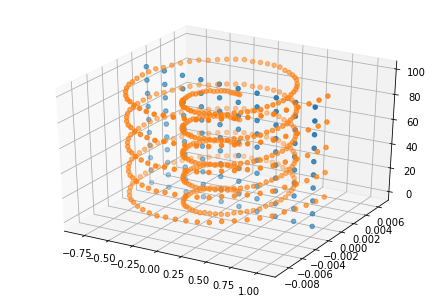

In [7]:
plot3D(lattice, (X,Y,Z))

# Last Step: Training

In [8]:
lattice.train(batch)

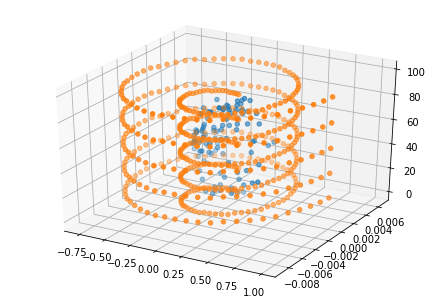

In [9]:
plot3D(lattice, (X,Y,Z))

Well, not efficient!